In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import pearsonr
import matplotlib
import os

In [41]:
save_dir = "results/opt_vs_bert"
os.makedirs(save_dir, exist_ok=True)


In [42]:
def assign_significance(pval):
    if pval < 0.001:
        sig = "***"
    elif pval < 0.01:
        sig = "**"
    elif pval < 0.05:
        sig = "*"
    else:
        sig = "n.s."
    return sig

In [32]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False,
                 'ytick.left': True,
                 'xtick.bottom': True,
                'grid.linestyle': "" #gets rid of horizontal lines
                }
sns.set_theme(font_scale=1.4, style="white", rc=custom_params)
#plt.style.use('seaborn-dark-palette')

In [33]:
def correlate_gpt_with_bert(GPT_VERSION, BERT_VERSION, DATASET, MASKING):
    fig, ax = plt.subplots(figsize=(5.5, 5))
    
    # Read GPT scores
    df_gpt = pd.read_csv(f'results/{DATASET}/{GPT_VERSION}/{DATASET}.csv')
    df_gpt = df_gpt.rename(columns={
        "PLL score" : f"{rename(GPT_VERSION)} LL score"
    })
    
    # Read BERT scores
    df_bert = pd.read_csv(f'results/{DATASET}/{BERT_VERSION}/{DATASET}_{MASKING}.csv')
    df_bert = df_bert.rename(columns={
            "PLL score" : f"{rename(BERT_VERSION)} PLL score"
        })
    
    # Merge dataframes
    if DATASET == "EventsAdapt":
        plot_df = df_gpt.merge(df_bert, how="inner", on="sentence")
    elif DATASET == "LibriSpeech":
        plot_df = df_gpt.merge(df_bert, how="inner", on="ref sentence")
    else:
        raise NotImplementedError

    r, pval = pearsonr(plot_df[f"{rename(GPT_VERSION)} LL score"], plot_df[f"{rename(BERT_VERSION)} PLL score"])

    palette = sns.cubehelix_palette(rot=-.2)[::-1]
    sns.regplot(data=plot_df, x=f"{rename(GPT_VERSION)} LL score", y=f"{rename(BERT_VERSION)} PLL score",
                              scatter_kws={"color": palette[2], "edgecolor": 'w',
                              "linewidth":0.5,
                              "s":50},
                            line_kws={"color": palette[1]}
                           ).set_title(f'{rename(MASKING)}\nR={round(r,2)} {assign_significance(pval)}',
                    fontdict={"fontweight":"bold", "fontsize":18}, pad=7)
    
    plt.tight_layout()
    import os

    # ...

    dir_loc= f"{save_dir}/{DATASET}_{GPT_VERSION}_vs_{BERT_VERSION}{MASKING}.png"

    # Check if the directory exists
    if not os.path.exists(os.path.dirname(dir_loc)):
        # If not, create it
        os.makedirs(os.path.dirname(dir_loc))

    plt.savefig(dir_loc, dpi=300, bbox_inches='tight')
    #plt.savefig(f"{save_dir}/{DATASET}_{GPT_VERSION}_vs_{BERT_VERSION}{MASKING}.png", dpi=300, bbox_inches='tight')
    plt.show()

In [40]:
RENAME_DICT_MODELS = {
    "gpt2-medium" : "GPT2-medium",
    "gpt2-xl" : "GPT2-xl",
    "bert-base-cased" : "BERT (base)",
    "bert-large-cased" : "BERT (large)",
    "roberta-base" : "RoBERTa (base)",
    "facebook/opt-125m" : "OPT-125M",
    "facebook/opt-350m" : "OPT-350M"
}

RENAME_DICT_METRICS = {
    "OriginalPLL" : "PLL-original",
    "AdjustedPLL_l2r" : "PLL-word-l2r",
    "AdjustedPLL_mlm" : "PLL-whole-word",
    "AdjustedPLL_globall2r" : "PLL-sentence-l2r",
    "" : ""
}

def rename(x):
    if x in RENAME_DICT_MODELS:
        return RENAME_DICT_MODELS[x]
    else:
        return RENAME_DICT_METRICS[x]

# EventsAdapt

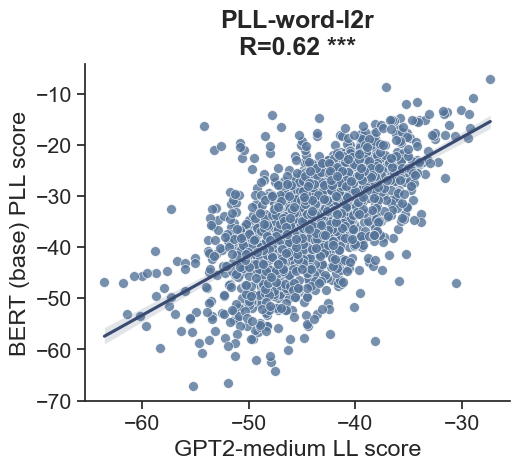

In [45]:
correlate_gpt_with_bert("gpt2-medium", "bert-base-cased", "EventsAdapt", "AdjustedPLL_l2r")

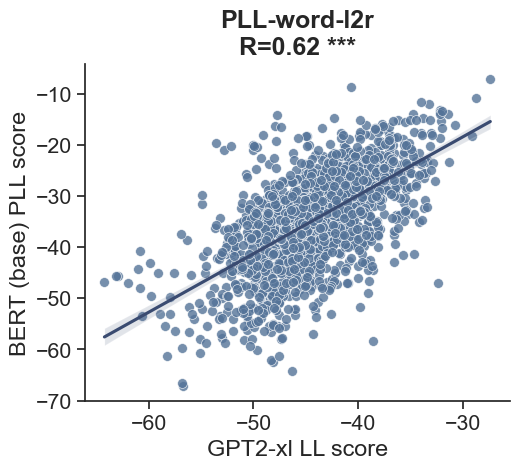

In [39]:
correlate_gpt_with_bert("gpt2-xl", "bert-base-cased", "EventsAdapt", "AdjustedPLL_l2r")

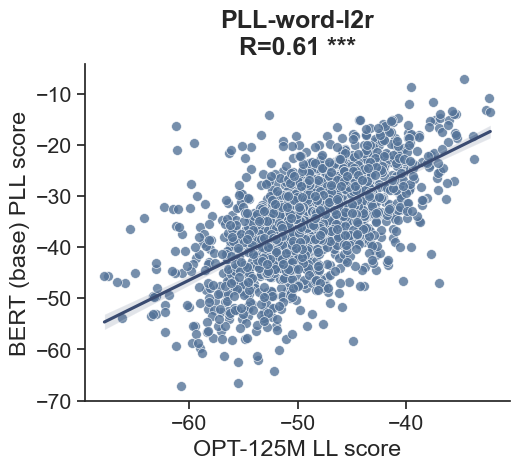

In [43]:
correlate_gpt_with_bert("facebook/opt-125m", "bert-base-cased", "EventsAdapt", "AdjustedPLL_l2r")

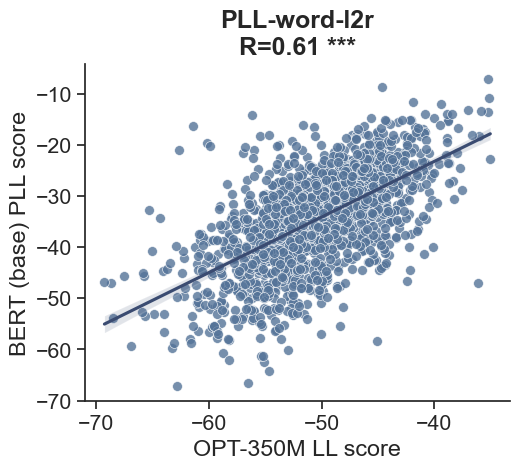

In [44]:
correlate_gpt_with_bert("facebook/opt-350m", "bert-base-cased", "EventsAdapt", "AdjustedPLL_l2r")